In [1]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
airline = pd.read_csv('airlinepassenger.csv')

In [3]:
airline.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
airline.isnull().sum()

Month         0
Passengers    0
dtype: int64

Text(0, 0.5, 'Passengers')

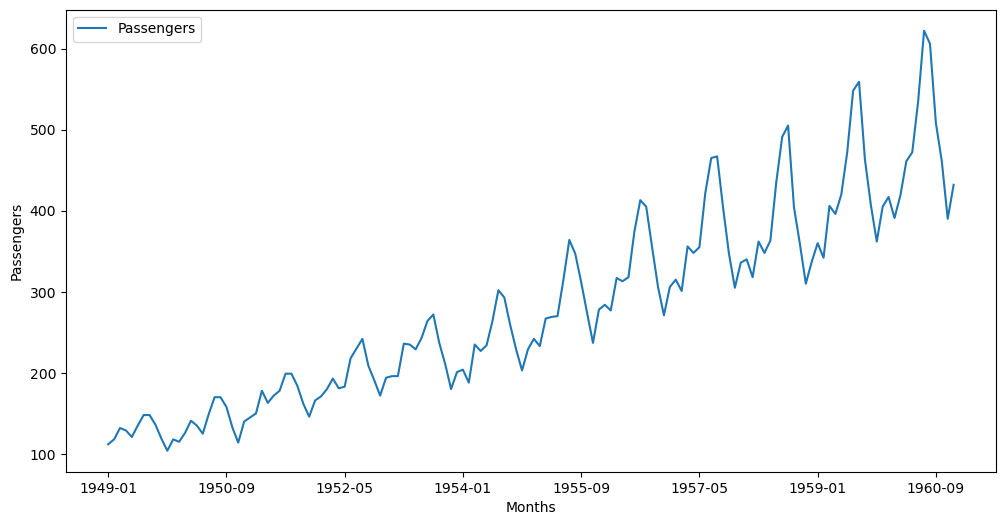

In [5]:
airline.plot(x='Month',y='Passengers',figsize=(12,6))
plt.xlabel('Months')
plt.ylabel('Passengers')

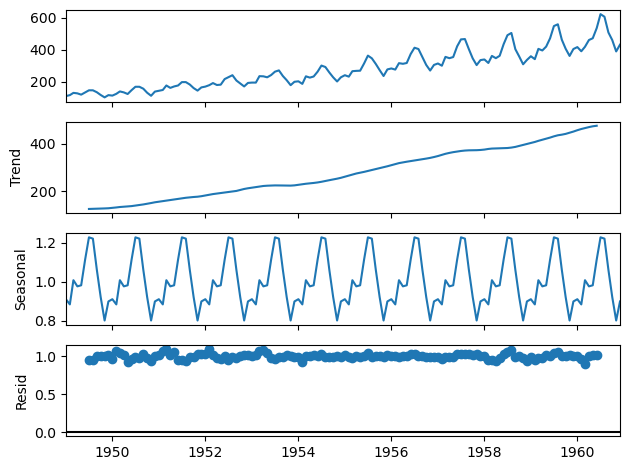

In [6]:
airline['Month'] = pd.to_datetime(airline['Month'])
airline = airline.set_index('Month')
result = seasonal_decompose(airline,model='multiplicative')
result.plot()
plt.show()

In [7]:
#Create Dummy Data
product = {
            'Month':[1,2,3,4,5,6,7,8,9,10,11,12],
            'Passenger':[290,260,288,300,310,303,329,340,316,330,308,310]
          }

product_df = pd.DataFrame(product)

In [8]:
product_df.head()

,Month,Passenger
0,1,290
1,2,260
2,3,288
3,4,300
4,5,310


In [9]:
product_df['SMA_3'] = product_df['Passenger'].rolling(window=3).mean()
product_df['SMA_4'] = product_df['Passenger'].rolling(window=4).mean()

In [10]:
product_df.head()

,Month,Passenger,SMA_3,SMA_4
0,1,290,NaN,NaN
1,2,260,NaN,NaN
2,3,288,279.333333,NaN
3,4,300,282.666667,284.5
4,5,310,299.333333,289.5


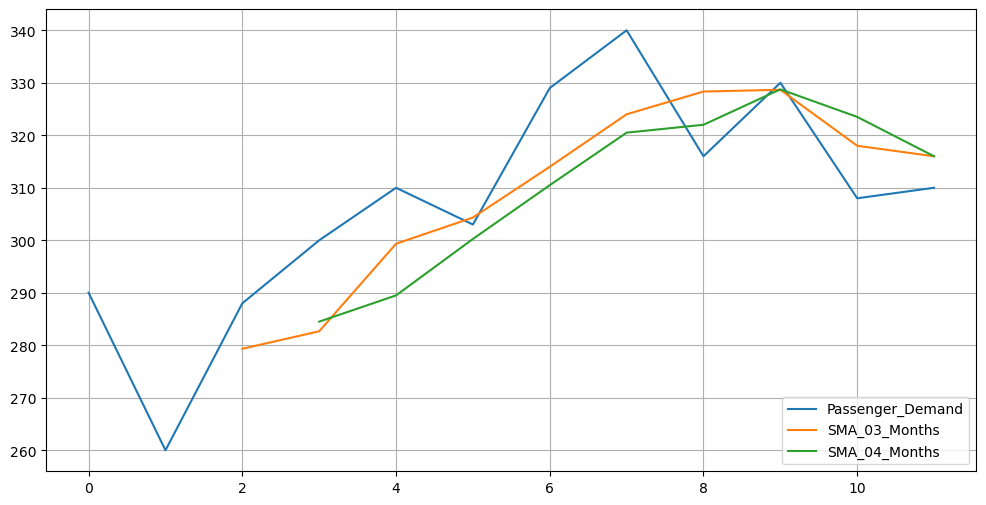

In [11]:
 fig,ax= plt.subplots(figsize=(12,6))
 plt.grid(True)
 plt.plot(product_df['Passenger'],label='Passenger_Demand')
 plt.plot(product_df['SMA_3'],label='SMA_03_Months')
 plt.plot(product_df['SMA_4'],label='SMA_04_Months')
 plt.legend(loc=4)